In [28]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("../")
import numpy as np
import matplotlib.pyplot as plt
import svis
from transform_datasets.patterns.natural import NaturalImagePatches, Omniglot
from transform_datasets.transforms import CenterMean, UnitStd, CyclicTranslation2D
from transform_datasets.dataset import TransformDataset
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import math
import copy
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


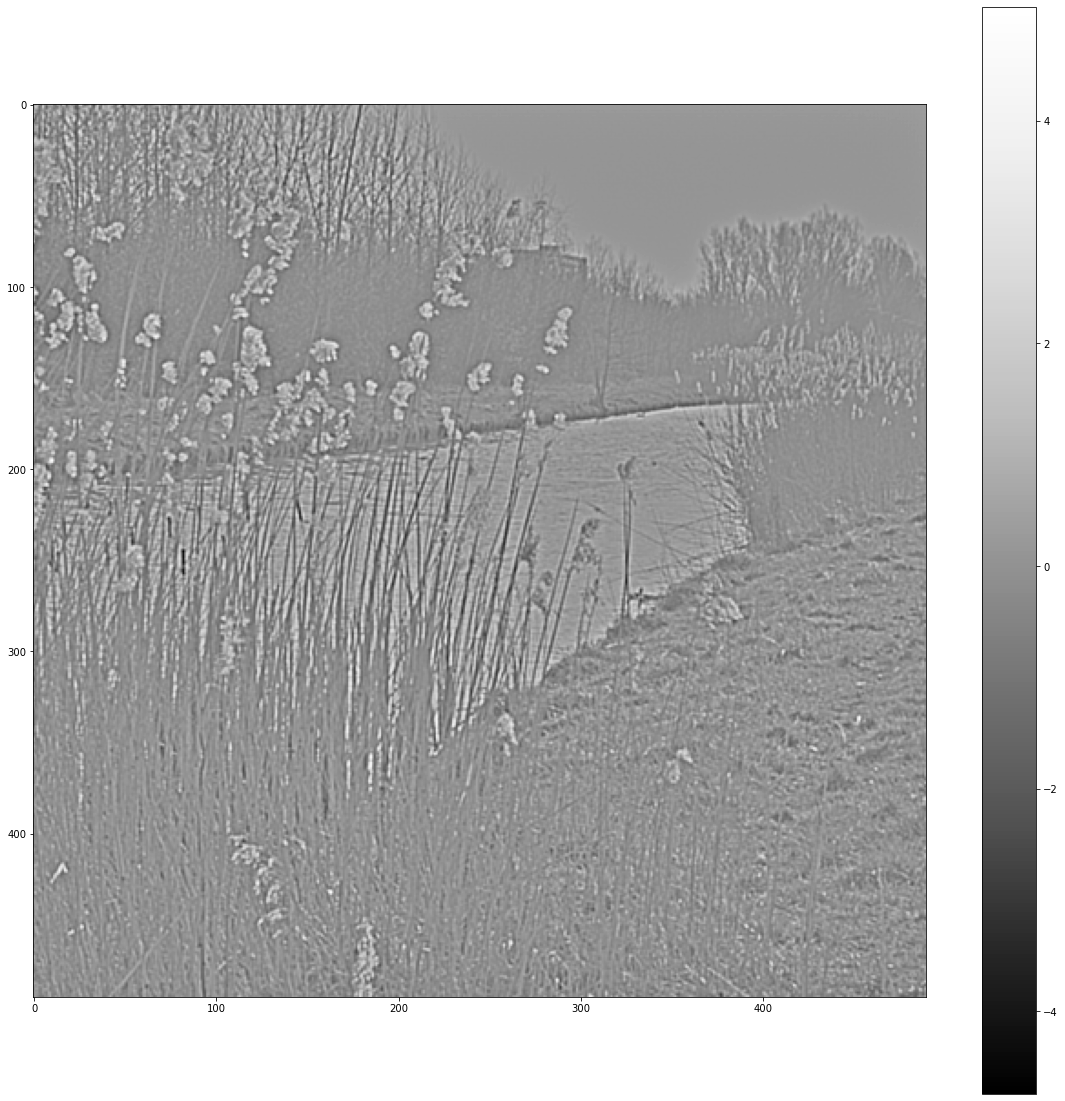

In [25]:
plt.figure(figsize=(20, 20))
plt.imshow(images[8, 11:501, 11:501], cmap="Greys_r")
plt.colorbar()

In [63]:
import os
import torch

class VanHateren(Dataset):
    def __init__(
        self,
        patches_per_image=10,
        patch_size=16,
        images=range(35),
        min_contrast=1.0,
    ):

        super().__init__()

        self.name = "van-hateren"
        full_img_shape = (512, 512)
        border = (11, 11)
        img_shape = (full_img_shape[0] - border[0]*2, full_img_shape[1] - border[1]*2)
        
        self.dim = patch_size ** 2

        directory = os.path.expanduser("~/datasets/van-hateren/IMAGES.mat")
        full_images = scipy.io.loadmat(directory)["IMAGES"][11:501, 11:501]
        full_images = np.transpose(full_images, (2, 0, 1))


        data = []
        labels = []

        i = 0
        

        for idx in images:
            
            img = full_images[idx]

            for p in range(patches_per_image):

                low_contrast = True
                j = 0 
                while low_contrast and j < 100:
                    start_x = np.random.randint(0, img_shape[1] - patch_size)
                    start_y = np.random.randint(0, img_shape[0] - patch_size)
                    patch = img[
                        start_y : start_y + patch_size, start_x : start_x + patch_size
                    ]
                    if patch.std() >= min_contrast:
                        low_contrast = False
                    j += 1
                
                if j == 100 and not low_contrast:
                    print("Couldn't find patch to meet contrast requirement. Skipping.")
                    continue
                    
                data.append(patch)
                labels.append(i)

                i += 1
                        
        self.data = torch.tensor(np.array(data))
        self.labels = torch.tensor(np.array(labels))
        self.patches_per_image = patches_per_image

    def __getitem__(self, idx):
        x = self.data[idx]
        y = self.labels[idx]
        return x, y

    def __len__(self):
        return len(self.data)

In [61]:
512 - 11

501

In [70]:
pattern = VanHateren(images=range(35), 
                     patch_size=8, 
                     min_contrast=1.0,
                     patches_per_image=10)
# transform1 = CenterMean()
# transform2 = UnitStd()
# transform3 = CyclicTranslation2D(fraction_transforms=1.0)
# dataset = TransformDataset(pattern, [transform1, transform2, transform3])

In [13]:
dataset.data.shape

torch.Size([70560, 28, 28])

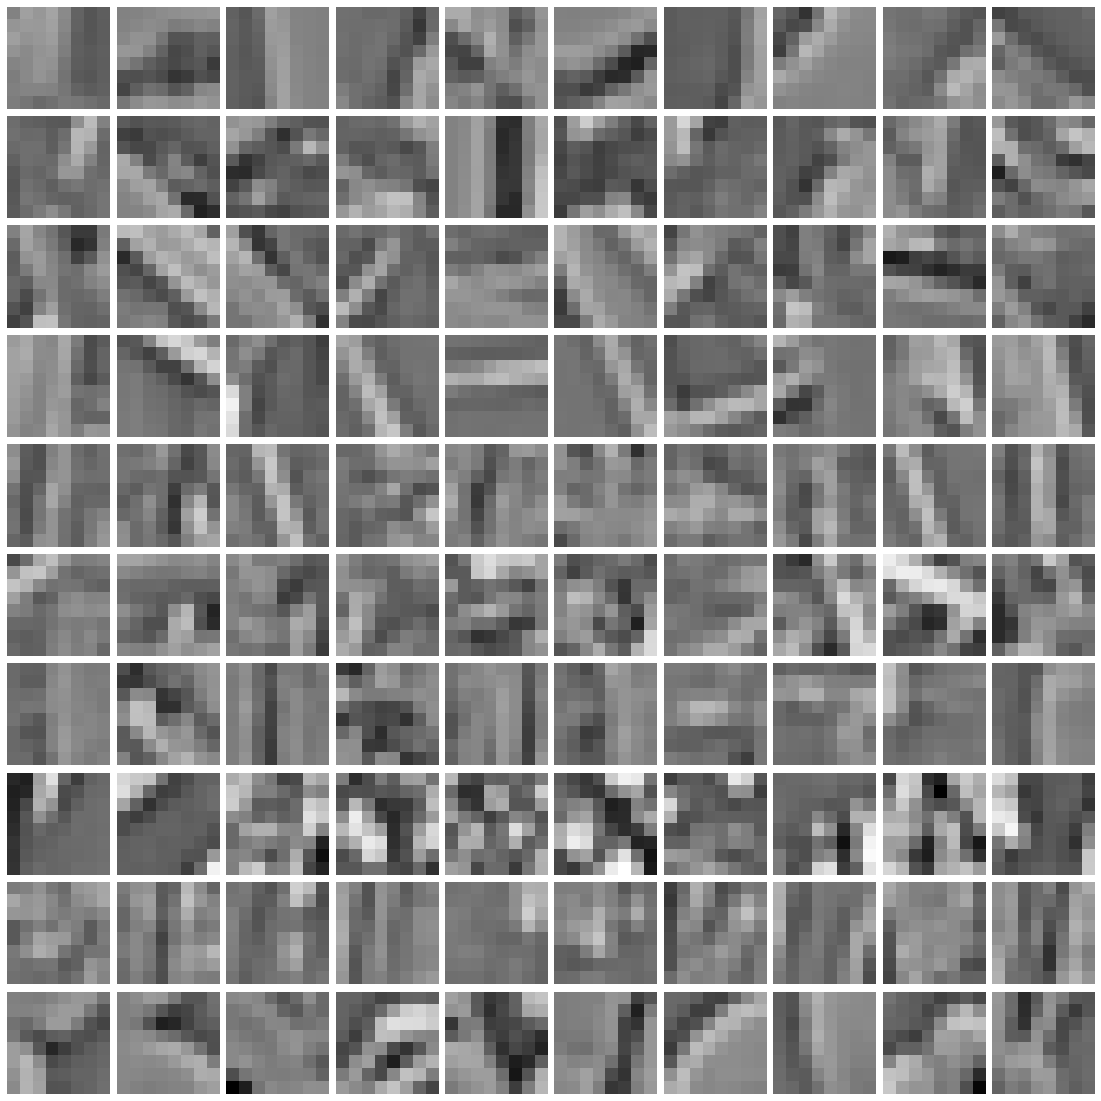

In [71]:
svis.image_grid(pattern.data[:100], cmap="Greys_r", figsize=(20, 20))